# Stochastics
Chapter 10 of Python for Finance.

Hilpisch, Yves. Python for Finance: Analyze Big Financial Data. O'Reilly Media. Kindle Edition.

### Random Numbers

In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
npr.rand(10)

array([ 0.49184091,  0.97691767,  0.02642354,  0.0161384 ,  0.16631404,
        0.94301115,  0.00485257,  0.98427663,  0.34322788,  0.92672285])

In [3]:
npr.rand(5,5)

array([[ 0.87214867,  0.56004471,  0.89439715,  0.67433896,  0.87544022],
       [ 0.21236772,  0.20225976,  0.87510148,  0.99941555,  0.19426428],
       [ 0.45556139,  0.21022555,  0.37075321,  0.04735382,  0.33907156],
       [ 0.03111374,  0.70818127,  0.09449215,  0.57635076,  0.42194529],
       [ 0.93337952,  0.94014233,  0.93771817,  0.16363026,  0.30289174]])

In [4]:
a = 5.
b = 10.


In [5]:
npr.rand(5,5)*(b-a)+a

array([[ 7.97757957,  5.57708766,  8.11317222,  9.38079247,  8.89373001],
       [ 7.97931055,  7.67761955,  8.84017714,  6.51149965,  7.63082427],
       [ 9.7143434 ,  6.56513515,  8.47505012,  8.46194617,  9.73424288],
       [ 5.87382979,  9.73612129,  8.20023016,  6.27124861,  9.94306991],
       [ 7.85884471,  6.19013246,  6.98301298,  9.44927153,  5.3259264 ]])

In [6]:
sample_size = 500 
rn1 = npr.rand(sample_size, 3) 
rn2 = npr.randint(0, 10, sample_size) 
rn3 = npr.sample(size = sample_size) 
a = [0, 25, 50, 75, 100] 
rn4 = npr.choice(a, size = sample_size)

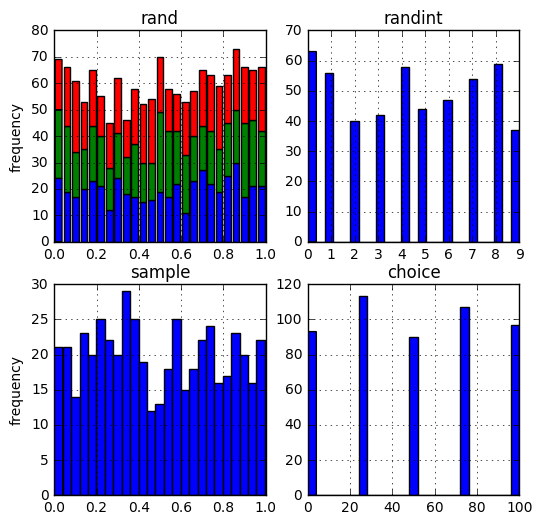

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize =(6, 6)) 
ax1.hist(rn1, bins = 25, stacked = True) 
ax1.set_title('rand') 
ax1.set_ylabel('frequency') 
ax1.grid(True) 
ax2.hist(rn2, bins = 25) 
ax2.set_title('randint') 
ax2.grid(True)
ax3.hist(rn3, bins = 25) 
ax3.set_title('sample') 
ax3.set_ylabel('frequency') 
ax3. grid(True)
ax4.hist(rn4, bins = 25) 
ax4.set_title('choice') 
ax4.grid(True)

### Other distributions
* Standard normal with mean of 0 and standard deviation of 1 
* Normal with mean of 100 and standard deviation of 20 
* Chi square with 0.5 degrees of freedom 
* Poisson with lambda of 1

In [8]:
sample_size = 500 
rn1 = npr.standard_normal(sample_size) 
rn2 = npr.normal(100, 20, sample_size) 
rn3 = npr.chisquare(df = 0.5, size = sample_size) 
rn4 = npr.poisson(lam = 1.0, size = sample_size)

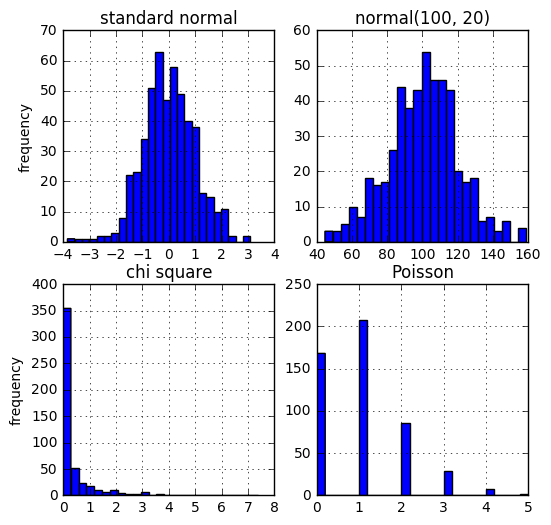

In [9]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize =(6, 6)) 
ax1.hist(rn1, bins = 25) 
ax1.set_title('standard normal') 
ax1.set_ylabel('frequency') 
ax1.grid(True)
ax2.hist(rn2, bins = 25) 
ax2.set_title('normal(100, 20)') 
ax2.grid(True) 
ax3.hist(rn3, bins = 25) 
ax3.set_title('chi square') 
ax3.set_ylabel('frequency') 
ax3.grid(True)
ax4.hist(rn4, bins = 25)
ax4.set_title('Poisson') 
ax4.grid(True)

## Simulation
Monte Carlo simulation

### Random variables
Starting with the Black-Scholes-Merton equation:

$$ S_T = S_0\exp((r-\frac{1}{2}\sigma^2)T + z\sigma\sqrt{T}) $$

* $ S_T $ = Index level at date T
* r = constant riskless short rate
* $\sigma $ = constant volatility, or standard deviation of returns of S
* z = standard normally distributied random variable

In [10]:
S0 = 100 # initial Value
r = 0.05 # constant short rate
sigma = 0.25 # constant volatility
T = 2.0 # time in years
I = 10000 # number of random draws

ST1 = S0 *  np.exp((r-0.5*sigma**2)*T + npr.standard_normal(I)*sigma*np.sqrt(T))

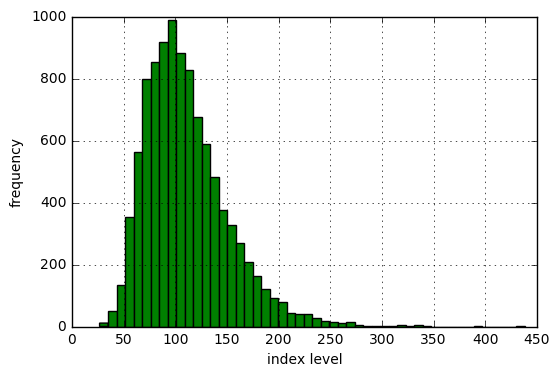

In [11]:
plt.hist(ST1, bins=50, color='green')
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True)

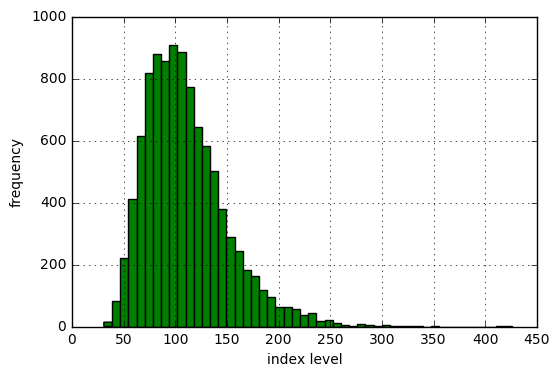

In [12]:
ST2 = S0 * npr.lognormal((r - 0.5*sigma**2)*T, sigma*np.sqrt(T), size = I)

plt.hist(ST2, bins=50, color='green')
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True)

Using statistics to compare the two sets of results:

In [13]:
import scipy.stats as scs

In [14]:
def print_statistics(a1, a2):
    ''' Prints selected statistics. 
    Parameters = = = = = = = = = = 
    a1, a2 : ndarray objects results object from simulation ''' 
    sta1 = scs.describe(a1) 
    sta2 = scs.describe(a2)
    print("{:14s} {:14s} {:14s}".format('statistic', 'data set 1', 'data set 2')) 
    print(45 * "-" )
    print("{:14s} {:14.0f} {:14.0f}".format('size', sta1[0], sta2[0])) 
    print("{:14s} {:14.3f} {:14.3f}".format('min', sta1[1][0], sta2[1][0])) 
    print("{:14s} {:14.3f} {:14.3f}".format('max', sta1[1][1], sta2[1][1])) 
    print("{:14s} {:14.3f} {:14.3f}".format('mean', sta1[2], sta2[2])) 
    print("{:14s} {:14.3f} {:14.3f}".format('std', np.sqrt(sta1[3]), np.sqrt(sta2[3]))) 
    print("{:14s} {:14.3f} {:14.3f}".format('skew', sta1[4], sta2[4])) 
    print("{:14s} {:14.3f} {:14.3f}".format('kurtosis', sta1[5], sta2[5]))

In [15]:
print_statistics(ST1, ST2)

statistic      data set 1     data set 2    
---------------------------------------------
size                    10000          10000
min                    26.693         30.842
max                   438.140        426.246
mean                  110.543        110.061
std                    40.217         39.740
skew                    1.198          1.164
kurtosis                2.757          2.528


A discretized version of the Black-Scholes-Merton equation:
    $$ S_t = S_{t-\Delta t} exp((r - \frac{1}{2}\sigma^2)\Delta t + \sigma z_t \sqrt{\Delta t} $$

In [16]:
I = 10000 
M = 50 
dt = T / M 
S = np.zeros((M + 1, I)) 
S[0] = S0 

for t in range(1, M + 1): 
    S[t] = S[ t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt( dt) * npr.standard_normal(I))

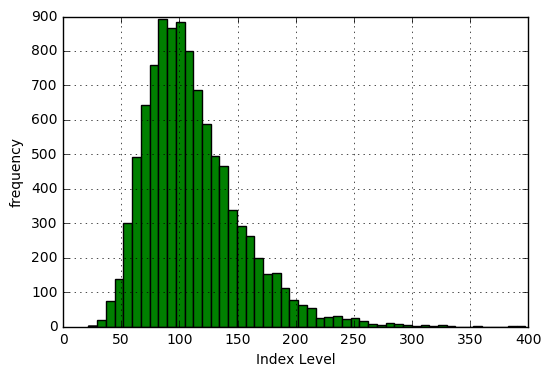

In [17]:
plt.hist(S[-1],bins=50, color = "green")
plt.xlabel('Index Level')
plt.ylabel('frequency')
plt.grid(True)

In [18]:
print_statistics(S[-1],ST2)

statistic      data set 1     data set 2    
---------------------------------------------
size                    10000          10000
min                    21.709         30.842
max                   397.650        426.246
mean                  111.048        110.061
std                    40.890         39.740
skew                    1.190          1.164
kurtosis                2.460          2.528


In [19]:
S[-1]

array([ 106.26045676,   73.5555367 ,   97.94732372, ...,  118.92751481,
         85.74251928,  159.97137936])

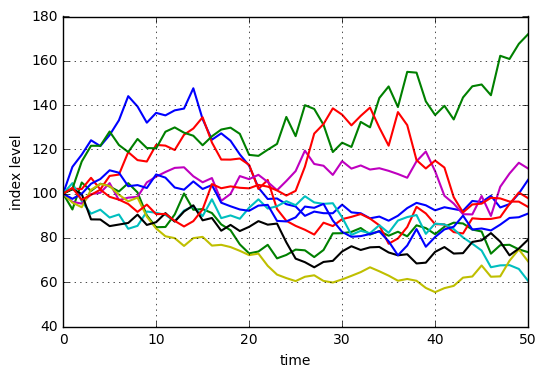

In [20]:
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)

### Square root diffusion
*Mean reverting processes*

$ dx_t = \kappa(\theta - x_t)dt + \sigma \sqrt{x_t} dZ_t $

* $x_t$ = process level at date t
* $\kappa$ = mean reversion factor
* $\theta$ = long term mean of the process
* $\sigma$ = constant volatility parameter
* Z = standard brownian motion

*Euler discretization for square-root diffusion*

$ \tilde{x_t} = \tilde{x_s} + \kappa(\theta - \tilde{x}_s^+)\Delta t + \sigma  z_t \sqrt{\tilde{x}_s^+} \sqrt{\Delta t} $

$ x_t = \tilde{x}_t^+ $

In [21]:
x0 = 0.05
kappa = 3.0
theta = 0.02
sigma = 0.1

In [22]:
I = 10000
M = 50
dt = T/M

def srd_euler():
    xh = np.zeros((M + 1, I))
    x1 = np.zeros_like(xh)
    xh[0] = x0
    x1[0] = x0
    
    for t in range(1, M+1):
        xh[t] = xh[t-1]+ kappa*(theta-np.maximum(xh[t-1],0))*dt + sigma*npr.standard_normal(I)*np.sqrt(np.maximum(xh[t-1],0))*np.sqrt(dt)
    x1 = np.maximum(xh,0)
    
    return x1

In [23]:
x1 = srd_euler()

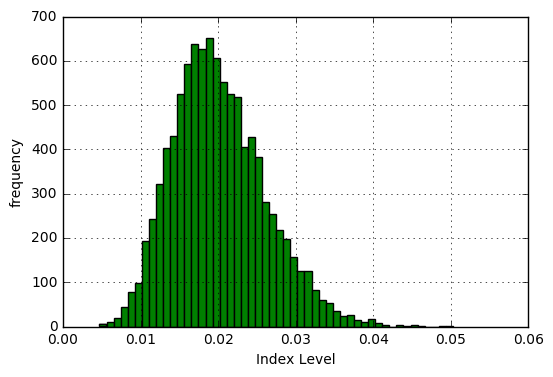

In [24]:
plt.hist(x1[-1],bins=50, color = 'green')
plt.xlabel('Index Level')
plt.ylabel('frequency')
plt.grid(True)

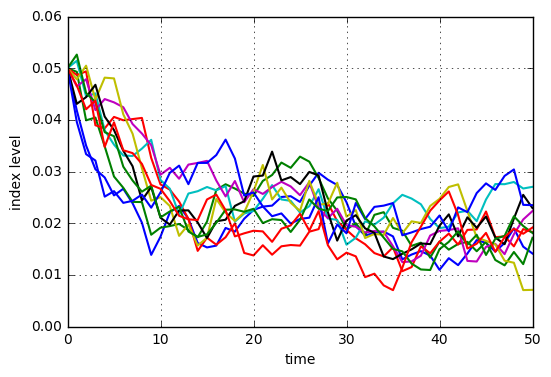

In [25]:
plt.plot(x1[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)

Exact discretization for square root diffusion:

$$ x_t = \frac{\sigma^2(1 - e^{-\kappa \Delta t})}{4\kappa} \chi_d^{'2}(\frac{4\kappa e^{-\kappa \Delta t}}{\sigma^2(1 - e^{-\kappa \Delta t})}x_s $$ 

In [26]:
def srd_exact():
    x2 = np.zeros((M + 1, I))
    x2[0] = x0
    for t in range(1, M+1):
        df = 4*theta*kappa/sigma**2
        c = (sigma**2 * (1-np.exp(-kappa*dt)))/(4*kappa)
        nc = np.exp(-kappa*dt)/c*x2[t-1]
        x2[t] = c*npr.noncentral_chisquare(df, nc, size = I)
    return x2

x2 = srd_exact()

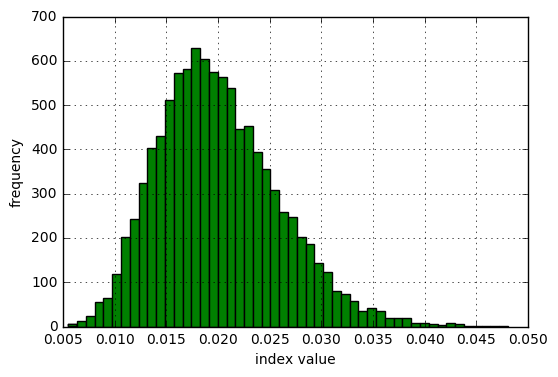

In [27]:
plt.hist(x2[-1], bins=50, color='green')
plt.xlabel('index value')
plt.ylabel('frequency')
plt.grid(True)

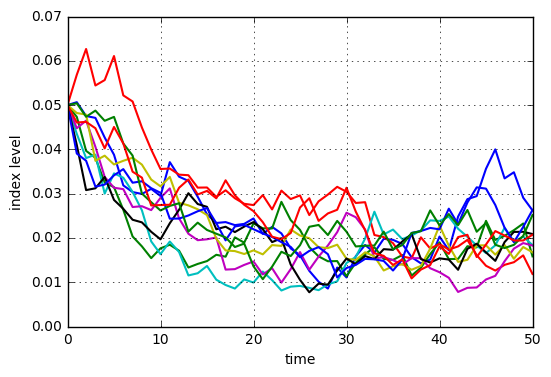

In [28]:
plt.plot(x2[:, :10], lw = 1.5) 
plt.xlabel('time') 
plt.ylabel('index level') 
plt.grid(True)

In [29]:
print_statistics(x1[-1], x2[-1])

statistic      data set 1     data set 2    
---------------------------------------------
size                    10000          10000
min                     0.005          0.005
max                     0.050          0.048
mean                    0.020          0.020
std                     0.006          0.006
skew                    0.543          0.604
kurtosis                0.354          0.504


In [30]:
I=250000
%time x1 = srd_euler()

Wall time: 1.56 s


In [31]:
%time x2 =srd_exact()

Wall time: 1.84 s


In [32]:
print_statistics(x1[-1], x2[-1])

statistic      data set 1     data set 2    
---------------------------------------------
size                   250000         250000
min                     0.003          0.003
max                     0.057          0.053
mean                    0.020          0.020
std                     0.006          0.006
skew                    0.559          0.578
kurtosis                0.485          0.512


### Stochastic Volatility Models

Stochastic differential equations for the Heston stochastic volatility model:

$ dS_t = rS_tdt + \sqrt{\nu_t}S_tdZ_t^1 $

$ d\nu_t = \kappa_\nu(\theta_\nu - \nu_t)dt + \sigma_nu\sqrt{\nu_t}dZ_t^2 $

$ dZ_t^1dZ_t^2 = \rho $

In [33]:
S0 = 100.
r = 0.05
v0 = 0.1
kappa =3
theta = 0.25
sigma = 0.1
rho = 0.6
T = 1

In [34]:
corr_mat = np.zeros((2,2))

In [35]:
corr_mat[0, :] = [1.0, rho]
corr_mat[1, :] = [rho, 1.0]
cho_mat =np.linalg.cholesky(corr_mat)
cho_mat

array([[ 1. ,  0. ],
       [ 0.6,  0.8]])

In [36]:
M = 50 
I = 10000
ran_num =npr.standard_normal((2, M+1, I))

In [37]:
dt = T/M
v = np.zeros_like(ran_num[0])
vh = np.zeros_like(v)
v[0] = v0
vh[0] = v0

for t in range(1, M+1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    vh[t] = (vh[t-1] + kappa*(theta-np.maximum(vh[t-1],0))*dt + sigma*np.sqrt(np.maximum(vh[t-1],0))*np.sqrt(dt)*ran[1])
    v = np.maximum(vh, 0)

In [38]:
S = np.zeros_like(ran_num[0])
S[0] = S0
for t in range(1, M+1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    S[t] = S[t-1] * np.exp((r-0.5*v[t])*dt + np.sqrt(v[t])*ran[0]*np.sqrt(dt))

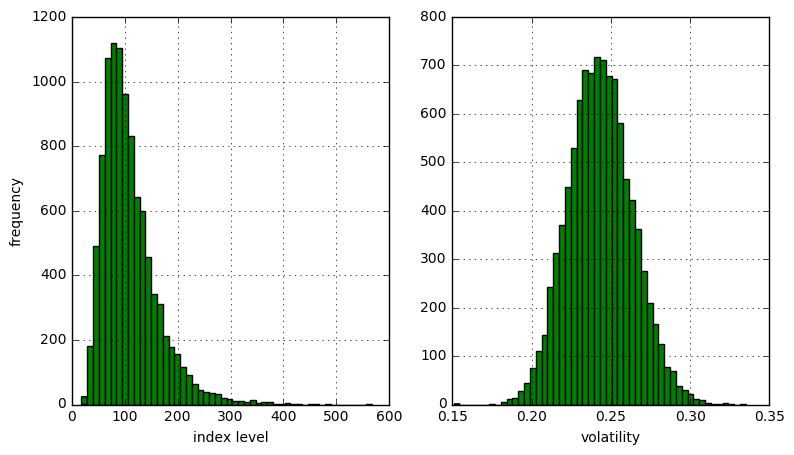

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(9, 5)) 
ax1.hist(S[-1], bins = 50, color='green') 
ax1.set_xlabel('index level') 
ax1.set_ylabel('frequency') 
ax1.grid(True) 
ax2.hist(v[-1], bins = 50,color='green') 
ax2.set_xlabel('volatility') 
ax2.grid(True)

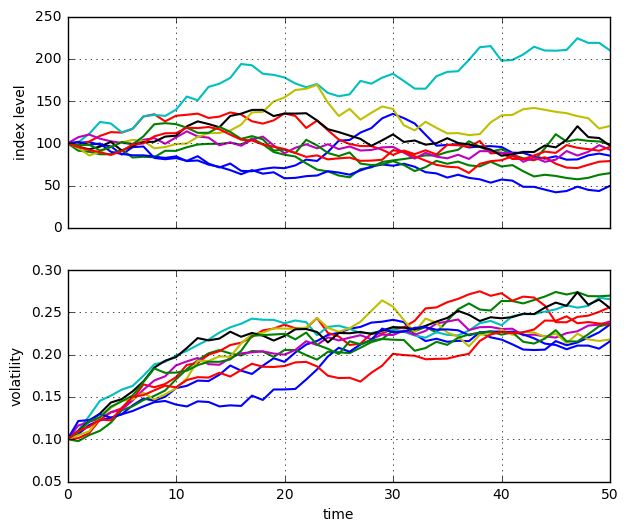

In [40]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize =(7, 6)) 
ax1.plot(S[:, :10], lw = 1.5) 
ax1.set_ylabel('index level') 
ax1.grid(True) 
ax2.plot(v[:, :10], lw = 1.5) 
ax2.set_xlabel('time') 
ax2.set_ylabel('volatility')
ax2.grid(True)

In [41]:
print_statistics(S[-1],v[-1])

statistic      data set 1     data set 2    
---------------------------------------------
size                    10000          10000
min                    18.033          0.151
max                   566.905          0.335
mean                  109.001          0.243
std                    52.579          0.020
skew                    1.621          0.161
kurtosis                4.513          0.111


### Jump Diffusion
*Stochastic differential equation for Merton jump diffusion model:*
$$ dS_t = (r-r_J)S_tdt + \sigma S_tdZ_t + J_tS_tdN_t$$

* $S_t$: Index level at date t
* r: constant riskless short rate
* $r_J \equiv \lambda(e^{\mu_J + \delta^2/2} -1)$: drift correction for jump to maintain risk neutrality
* $\sigma$: constant volatility of S
* $Z_t$: standard brownian motion
* $J_t$: jump at date t with distribution
    * $ log(1 + J_t) = N(log(1 + \mu_J) - \frac{\delta^2}{2}), \delta^2)$
    * N: cumulative distribution of a standard normal variable $N_t$
    
#### Euler discretization for Merton jump diffusion model
$$ S_t = S_{t-\delta t}(e^{(r-r_J-\sigma^2/2)\Delta t + \sigma \sqrt{\Delta t}z_t^1)} + (e^{\mu_J+\delta z_t^2} - 1)y_t)$$
  

In [42]:
S0 = 100. 
r = 0.05 
sigma = 0.2
lamb = 0.75
mu = -0.6 
delta = 0.25 
T = 1.0

In [43]:
M = 50 
I = 10000 
dt = T / M 
rj = lamb * (np.exp( mu + 0.5 * delta ** 2) - 1) 
S = np.zeros(( M + 1, I)) 
S[0] = S0 
sn1 = npr.standard_normal((M + 1, I)) 
sn2 = npr.standard_normal((M + 1, I)) 
poi = npr.poisson(lamb * dt, (M + 1, I)) 

for t in range(1, M + 1, 1): 
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * sn1[t]) + \
                       (np.exp(mu + delta * sn2[t]) - 1) * poi[t]) 
    S[t] = np.maximum(S[t], 0)

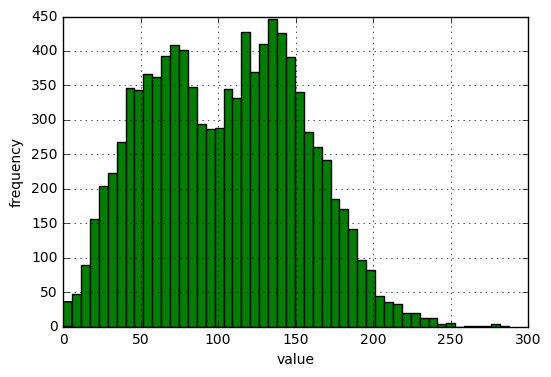

In [44]:
plt.hist(S[-1], bins = 50, color='green') 
plt.xlabel('value') 
plt.ylabel('frequency') 
plt.grid( True)

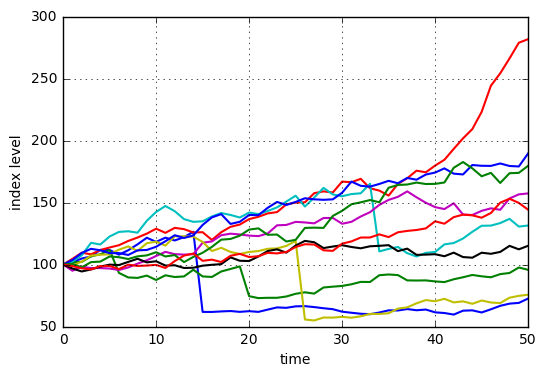

In [45]:
plt.plot(S[:, :10], lw = 1.5) 
plt.xlabel('time') 
plt.ylabel('index level') 
plt.grid(True)

## Variance reduction
Looking at the statistics of standard normal draws as the sample size grows. 

In [46]:
print("{:15s} {:15s}".format('Mean', 'Std. Deviation'))
print(31 * "-") 
for i in range(1, 31, 2): 
    npr.seed(1000) 
    sn = npr.standard_normal(i ** 2 * 10000) 
    print("{:15.12f} {:15.12f}".format(sn.mean(), sn.std()))

Mean            Std. Deviation 
-------------------------------
-0.011870394558  1.008752430725
-0.002815667298  1.002729536352
-0.003847776704  1.000594044165
-0.003058113374  1.001086345326
-0.001685126538  1.001630849589
-0.001175212007  1.001347684642
-0.000803969036  1.000159081432
-0.000601970954  0.999506522127
-0.000147787693  0.999571756099
-0.000313035581  0.999646153704
-0.000178447061  0.999677277878
 0.000096501709  0.999684346792
-0.000135677013  0.999823841902
-0.000015726986  0.999906493379
-0.000039368519  1.000063091949


In [47]:
i**2*10000

8410000

### Antithetic variates
To reduce the variance of these standard normal draws, we only draw half the desired number and then replicate them with the opposite sign.

In [48]:
sn = npr.standard_normal(10000/2)
sn = np.concatenate((sn,-sn))
np.shape(sn)

C:\Users\tttri\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


(10000,)

In [49]:
print("{:15s} {:15s}".format('Mean', 'Std. Deviation'))
print(31 * "-") 
for i in range(1, 31, 2): 
    npr.seed(1000) 
    sn = npr.standard_normal(i ** 2 * 10000/2)
    sn = np.concatenate((sn,-sn))
    print("{:15.12f} {:15.12f}".format(sn.mean(), sn.std()))

Mean            Std. Deviation 
-------------------------------
 0.000000000000  1.009653753942
-0.000000000000  1.000413716783
 0.000000000000  1.002925061201
-0.000000000000  1.000755212673
 0.000000000000  1.001636910076
-0.000000000000  1.000726758438


C:\Users\tttri\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


-0.000000000000  1.001621265149
 0.000000000000  1.001203722778
-0.000000000000  1.000556669784
 0.000000000000  1.000113464185
-0.000000000000  0.999435175324
 0.000000000000  0.999356961431
-0.000000000000  0.999641436845
-0.000000000000  0.999642768905
-0.000000000000  0.999638303451


#### Moment matching
By subtracting the mean from every single random number and dividing by the standard deviation, we match the first (mean) and second (standard deviation) moments of the standard normal distribution almost perfectly

In [50]:
sn =npr.standard_normal(10000)
print('{:15.12f} {:15.12f}'.format(sn.mean(), sn.std()))

-0.001165998295  0.991255920205


In [51]:
sn_new = (sn - sn.mean())/sn.std()
print('{:15.12f} {:15.12f}'.format(sn_new.mean(), sn_new.std()))

-0.000000000000  1.000000000000


In [52]:
def gen_sn(M, I, anti_paths = True, mo_match = True):
    ''' Function to generate random numbers for simulation. 
    Parameters = = = = = = = = = = 
    M : int number of time intervals for discretization 
    I : int number of paths to be simulated 
    anti_paths: Boolean use of antithetic variates 
    mo_math : Boolean use of moment matching '''
    
    if anti_paths is True: 
        sn = npr.standard_normal(( M + 1, I / 2)) 
        sn = np.concatenate((sn, -sn), axis = 1) 
    
    else: 
        sn = npr.standard_normal((M + 1, I))
    if mo_match is True:
        sn = (sn - sn.mean()) / sn.std() 
    return sn

## Valuation

European option pricing:
$$ C_0 = e^{-rT}E_0^Q(h(S_T)) = e^{-rT}\int_0^\infty h(s)q(s)ds $$

This translates to:
$$ \tilde{C_0} = e^{-rT}\frac{1}{I}\sum_{i=1}^{I} h(\tilde{S}_T^i)$$

In [53]:
S0 = 100.
r = 0.05
sigma = 0.25
T = 1.0
I = 50000

def gbm_mcs_stat(K):
    ''' Valuation of European call option in Black-Scholes-Merton 
    by Monte Carlo simulation (of index level at maturity) 
    
    Parameters = = = = = = = = = = 
    K : float (positive) strike price of the option 
    
    Returns = = = = = = = 
    C0 : float estimated present value of European call option ''' 
    
    sn = gen_sn(1, I) # simulate index level at maturity 
    ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt( T) * sn[1]) # calculate payoff at maturity 
    hT = np.maximum(ST - K, 0) # calculate MCS estimator 
    C0 = np.exp(-r * T) * 1 / I * np.sum(hT) 
    
    return C0

In [54]:
gbm_mcs_stat(K=105)

C:\Users\tttri\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


10.044221852841922

In [55]:
M = 50

def gbm_mcs_dyna(K, option='call'):
    ''' Valuation of European options in Black-Scholes-Merton 
    by Monte Carlo simulation (of index level paths) 
    
    Parameters = = = = = = = = = = 
    K : float (positive) strike price of the option 
    option : string type of the option to be valued (' call', 'put')
    
    Returns = = = = = = = C0 : float estimated present value of European call option ''' 
    
    dt = T / M # simulation of index level paths
    S = np.zeros((M + 1, I)) 
    S[0] = S0 
    sn = gen_sn(M, I) 
    
    for t in range(1, M + 1): 
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * sn[t]) 
        
    # case-based calculation of payoff 
    if option == 'call': 
        hT = np.maximum(S[-1] - K, 0) 
    else: hT = np.maximum(K - S[-1], 0) 

    # calculation of MCS estimator 
    C0 = np.exp(-r * T) * 1 / I * np.sum(hT) 
    return C0

In [56]:
gbm_mcs_dyna(K=110., option='call')

C:\Users\tttri\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


7.9500085250284336

In [57]:
gbm_mcs_dyna(K=110., option='put')

C:\Users\tttri\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


12.629934942682004

Comparing option pricing values:

In [58]:
from bsm_functions import bsm_call_value
stat_res = []
dyna_res = []
anal_res = []
k_list = np.arange(80., 120.1, 5.)
np.random.seed(200000)
for K in k_list:
    stat_res.append(gbm_mcs_stat(K))
    dyna_res.append(gbm_mcs_dyna(K))
    anal_res.append(bsm_call_value(S0, K, T, r, sigma))
    
stat_res = np.array(stat_res)
dyna_res = np.array(dyna_res)
anal_res = np.array(anal_res)

C:\Users\tttri\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


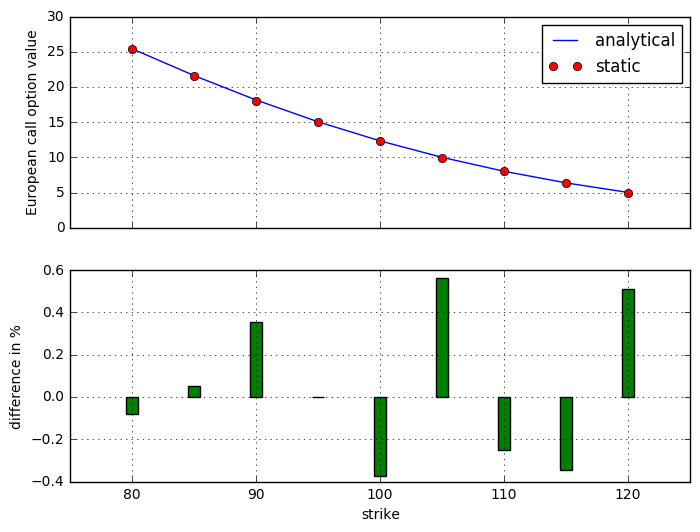

In [59]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize =(8, 6)) 
ax1.plot(k_list, anal_res, 'b', label ='analytical') 
ax1.plot(k_list, stat_res, 'ro', label ='static') 
ax1.set_ylabel('European call option value')
ax1.grid(True)
ax1.legend(loc = 0) 
ax1.set_ylim(ymin = 0) 
wi = 1.0 

ax2.bar(k_list - wi / 2, (anal_res - stat_res) / anal_res * 100, wi, color='green')
ax2.set_xlabel('strike') 
ax2.set_ylabel('difference in %') 
ax2.set_xlim(left = 75, right = 125)
ax2.grid(True)

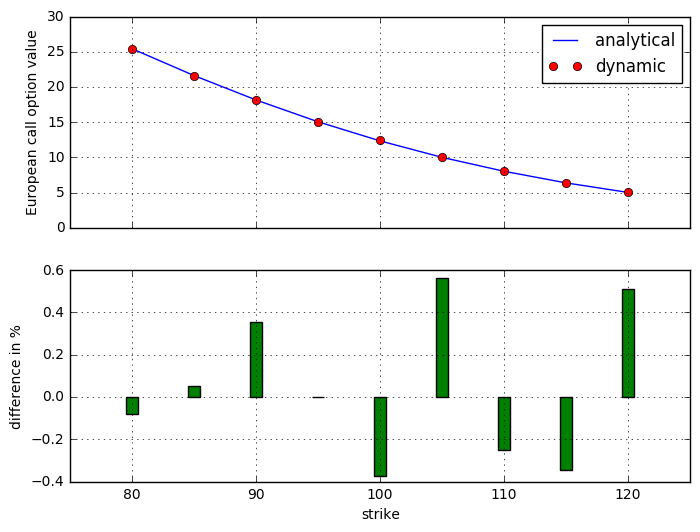

In [60]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize =(8, 6)) 
ax1.plot(k_list, anal_res, 'b', label ='analytical') 
ax1.plot(k_list, dyna_res, 'ro', label ='dynamic') 
ax1.set_ylabel('European call option value')
ax1.grid(True)
ax1.legend(loc = 0) 
ax1.set_ylim(ymin = 0) 
wi = 1.0 

ax2.bar(k_list - wi / 2, (anal_res - stat_res) / anal_res * 100, wi, color='green')
ax2.set_xlabel('strike') 
ax2.set_ylabel('difference in %') 
ax2.set_xlim(left = 75, right = 125)
ax2.grid(True)

## American Options
Optimal stopping problem : Least Squares Monte Carlo from Longstaff and Schwart


In [61]:
def gbm_mcs_amer(K, option =' call'): 
    ''' Valuation of American option in Black-Scholes-Merton 
    by Monte Carlo simulation by LSM algorithm 
    
    Parameters = = = = = = = = = = 
    K : float (positive) strike price of the option 
    option : string type of the option to be valued ('call', 'put') 
    
    Returns = = = = = = = 
    C0 : float estimated present value of European call option'''
    
    dt = T / M 
    df = np.exp(-r * dt) # simulation of index levels 
    S = np.zeros((M + 1, I)) 
    S[0] = S0 
    sn = gen_sn(M, I) 
    
    for t in range(1, M + 1): 
        S[t] = S[ t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * sn[t]) 
        
    # case-based calculation of payoff 
    if option == 'call': 
        h = np.maximum(S - K, 0) 
    else: h = np.maximum(K - S, 0) 

    # LSM algorithm 
    V = np.copy(h) 
    for t in range(M - 1, 0, -1): 
        reg = np.polyfit(S[t], V[t + 1] * df, 7) 
        C = np.polyval(reg, S[t]) 
        V[t] = np.where(C > h[t], V[t + 1] * df, h[t]) 

    # MCS estimator 
    C0 = df * 1 / I * np.sum(V[1]) 
    return C0

In [62]:
gbm_mcs_amer(110., option='call')

C:\Users\tttri\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


7.7789332794493147

In [63]:
gbm_mcs_amer(110., option='put')

C:\Users\tttri\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


13.614023206242445

In [64]:
euro_res = [] 
amer_res = [] 
k_list = np.arange(80., 120.1, 5.) 

for K in k_list: 
    euro_res.append(gbm_mcs_dyna(K, 'put')) 
    amer_res.append(gbm_mcs_amer(K, 'put')) 

euro_res = np.array(euro_res) 
amer_res = np.array(amer_res)

C:\Users\tttri\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


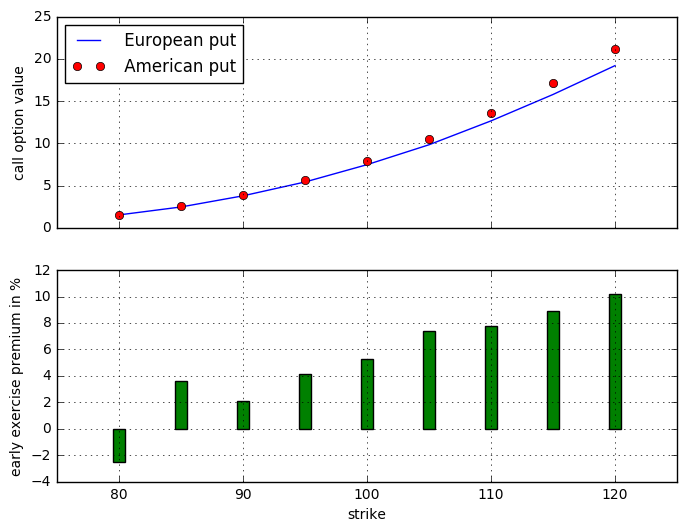

In [65]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize =(8, 6)) 
ax1.plot(k_list, euro_res, 'b', label =' European put') 
ax1.plot(k_list, amer_res, 'ro', label =' American put') 
ax1.set_ylabel('call option value') 
ax1.grid(True)
ax1.legend(loc = 0) 
wi = 1.0 
ax2.bar(k_list - wi / 2, (amer_res - euro_res) / euro_res * 100, wi, color='green') 
ax2.set_xlabel('strike') 
ax2.set_ylabel('early exercise premium in %') 
ax2.set_xlim(left = 75, right = 125)
ax2.grid(True)

## Risk Measures

### Value at Risk

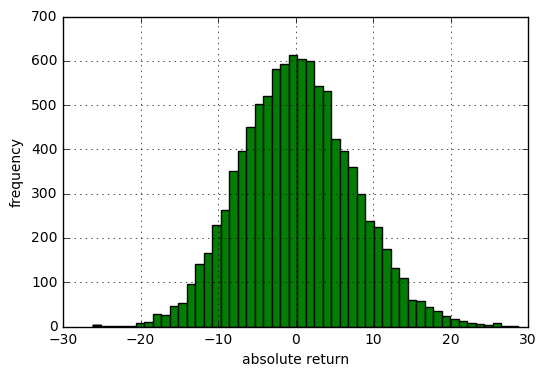

In [66]:
S0 = 100
r = 0.05
sigma = 0.25
T = 30/365
I = 10000
ST = S0*np.exp((r-0.5*sigma**2)*T + sigma*np.sqrt(T)*npr.standard_normal(I))

R_gbm = np.sort(ST-S0)

plt.hist(R_gbm, bins=50, color='green')
plt.xlabel('absolute return')
plt.ylabel('frequency')
plt.grid(True)

In [67]:
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0] 
var = scs.scoreatpercentile(R_gbm, percs)

In [68]:
print("{:16s} {:16s}".format('Confidence Level', 'Value at Risk'))
print(33*'-')
for pair in zip(percs, var):
    print('{:16.2f} {:16.3f}'.format(100-pair[0],-pair[1]))

Confidence Level Value at Risk   
---------------------------------
           99.99           26.072
           99.90           20.175
           99.00           15.753
           97.50           13.265
           95.00           11.298
           90.00            8.942


Second example - using the jump diffusion:

In [69]:
dt = 30. / 365 / M 
rj = lamb * (np.exp(mu + 0.5 * delta ** 2) - 1) 
S = np.zeros((M + 1, I)) 
S[0] = S0 
sn1 = npr.standard_normal((M + 1, I)) 
sn2 = npr.standard_normal((M + 1, I)) 
poi = npr.poisson(lamb * dt, (M + 1, I)) 

for t in range(1, M + 1, 1): 
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt 
                       + sigma * np.sqrt( dt) * sn1[t]) 
                       + (np.exp( mu + delta * sn2[ t]) - 1) 
                       * poi[ t])
    S[t] = np.maximum(S[t],0)

In [70]:
R_jd = np.sort(S[-1]-S0)

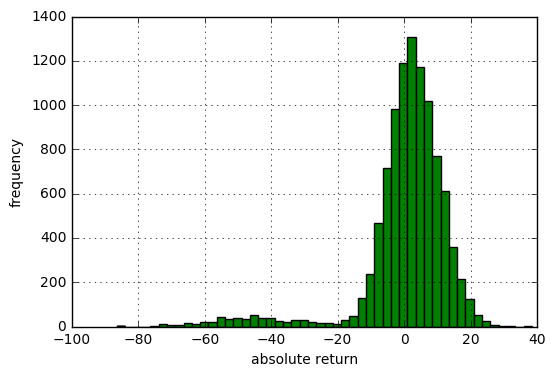

In [71]:
plt.hist(R_jd, bins=50, color='green')
plt.xlabel('absolute return')
plt.ylabel('frequency')
plt.grid(True)

In [72]:
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0] 
var = scs.scoreatpercentile(R_jd, percs)

print("{:16s} {:16s}".format('Confidence Level', 'Value at Risk'))
print(33*'-')
for pair in zip(percs, var):
    print('{:16.2f} {:16.3f}'.format(100-pair[0],-pair[1]))

Confidence Level Value at Risk   
---------------------------------
           99.99           75.029
           99.90           71.833
           99.00           55.901
           97.50           45.697
           95.00           25.993
           90.00            8.773


(-90.0, 0.0)

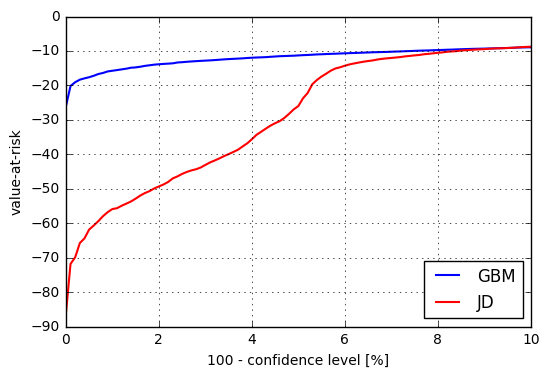

In [73]:
percs = list(np.arange(0.0, 10.1, 0.1)) 
gbm_var = scs.scoreatpercentile(R_gbm, percs) 
jd_var = scs.scoreatpercentile(R_jd, percs)

plt.plot(percs, gbm_var, 'b', lw = 1.5, label ='GBM') 
plt.plot(percs, jd_var, 'r', lw = 1.5, label ='JD') 
plt.legend(loc = 4)
plt.xlabel('100 - confidence level [%]') 
plt.ylabel('value-at-risk') 
plt.grid(True) 
plt.ylim(ymax = 0.0)

### Credit Value Adjustments (CVAs)

In [74]:
S0 = 100.
r = 0.05
sigma = 0.2
T = 1.
I = 100000
ST = S0*np.exp((r-0.5*sigma**2)*T + sigma*np.sqrt(T)*npr.standard_normal(I)) 

L = 0.5 #loss given default
p = 0.01 #Probability of default

In [75]:
D = npr.poisson(p*T, I)
D = np.where(D>1,1,D)

In [76]:
np.exp(-r*T) * 1/I * np.sum(ST)

99.981825216842921

In [77]:
CVaR = np.exp(-r*T) * 1/I * np.sum(L*D*ST)
CVaR

0.5152011134161355

In [78]:
S0_CVA = np.exp(-r*T) * 1/I * np.sum((1-L*D)*ST)
S0_CVA

99.466624103426781

In [79]:
S0_adj = S0 - CVaR
S0_adj

99.48479888658386

In [80]:
np.count_nonzero(L*D*ST)

1031

(0.0, 175)

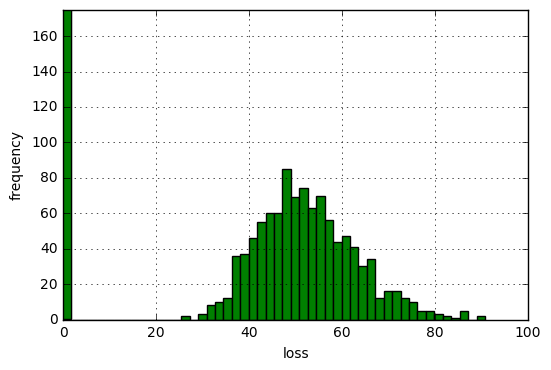

In [81]:
plt.hist(L * D * ST, bins = 50, color='green') 
plt.xlabel('loss') 
plt.ylabel('frequency') 
plt.grid(True) 
plt.ylim(ymax = 175)


In [82]:
K = 100
hT = np.maximum(ST-K, 0)
C0 = np.exp(-r*T) * 1/I * np.sum(hT)
C0

10.427336109660052

In [83]:
CVaR = np.exp(-r*T) * 1/I * np.sum(L*D*hT)
CVaR

0.053822578452208093

In [84]:
C0_CVA = np.exp(-r*T) * 1/I * np.sum((1-L*D)*hT)
C0_CVA

10.373513531207843

In [85]:
np.count_nonzero(L*D*hT) # Number of losses

582

In [86]:
np.count_nonzero(D) # Number of defaults

1031

In [87]:
I - np.count_nonzero(hT) # zero payoff

43995

(0.0, 350)

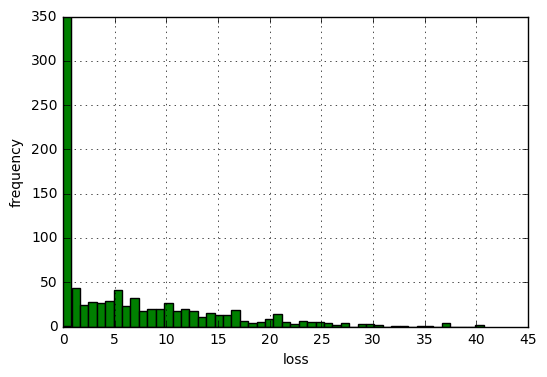

In [88]:
plt.hist(L*D*hT, bins=50, color='green')
plt.xlabel('loss')
plt.ylabel('frequency')
plt.grid(True)
plt.ylim(ymax=350)